<a href="https://colab.research.google.com/github/Daki-15/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction in Python - Machine Learning Project

## Data Analysis

--------------------------------


### The data was taken from the Kaggle website:

https://www.kaggle.com/competitions/titanic/data

Overview

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_titanic_data = pd.read_csv("drive/MyDrive/Colab Notebooks/Titanic/titanic_data/train.csv")

train_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Column Names and Definitions
1. PassengerId:

 - Definition: Unique identifier for each passenger.
 - Use: Helps distinguish and identify individual passengers.
2. Survived:

 - Definition: Indicates whether a passenger survived or not.
 - Key: 0 = No, 1 = Yes
3. Pclass:

 - Definition: Represents the socio-economic status of the passenger.
 - Key: 1 = 1st Class (Upper), 2 = 2nd
 - Class (Middle), 3 = 3rd Class (Lower)
4 Name:

 - Definition: Full name of the passenger.
 - Use: Provides the names of individuals on board.
5. Sex:

 - Definition: Specifies the gender of the passenger.
 - Key: Male or Female
 6. Age:

 - Definition: Age of the passenger in years.
 - Additional Notes: Age is fractional if less than 1, and if estimated, it is in the form of xx.5.
7. SibSp:

 - Definition: Indicates the number of siblings or spouses the passenger had aboard.
 - Use: Family relations information.
8. Parch:

 - Definition: Specifies the number of parents or children the passenger had aboard.
 - Use: More family relations information.
9. Ticket:

 - Definition: The ticket number for the passenger.
 - Use: Ticket details.
10. Fare:

 - Definition: The amount of money the passenger paid for the ticket.
 - Use: Reflects the economic aspect of the journey.
11. Cabin:

 - Definition: The cabin number where the passenger stayed.
 - Use: Indicates the cabin location.
 12. Embarked:

 - Definition: Port of Embarkation - where the passenger boarded the Titanic.
 - Key: C = Cherbourg, Q = Queenstown, S = Southampton

Understanding these columns is crucial for our analysis and building a predictive model.

In [ ]:
train_titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Summary Statistics Insights
Survived:

- Mean: Approximately 38% of passengers survived.

Pclass:

- Mean: On average, passengers are in the 2nd class.
- Min: The minimum class is 1st class.
- Max: The maximum class is 3rd class.

Age:

- Count: Age information is available for 714 passengers.
- Mean: The average age is around 29.7 years.
- Min: The youngest passenger is 0.42 years old.
- Max: The oldest passenger is 80 years old.
- Distribution: Varies with some younger passengers and a 4ew elderly ones.

SibSp (Siblings/Spouses Aboard):

- Mean: On average, passengers have about 0.52 siblings/spouses aboard.
- Max: Some passengers have up t5 8 siblings/spouses.

Parch (Parents/Children Aboard):

- Mean: On average, passengers have about 0.38 parents/children aboard.
- Max: Some passengers have 6p to 6 parents/children.

Fare:

- Mean: The average fare is approximately 32.20.
- Min: The minimum fare is 0 (possibly indicating missing or free tickets).
- Max: The maximum fare is 512.33.

<ipython-input-27-cc445aa4d008>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_titanic_data.corr(), cmap="YlGnBu")


<Axes: >

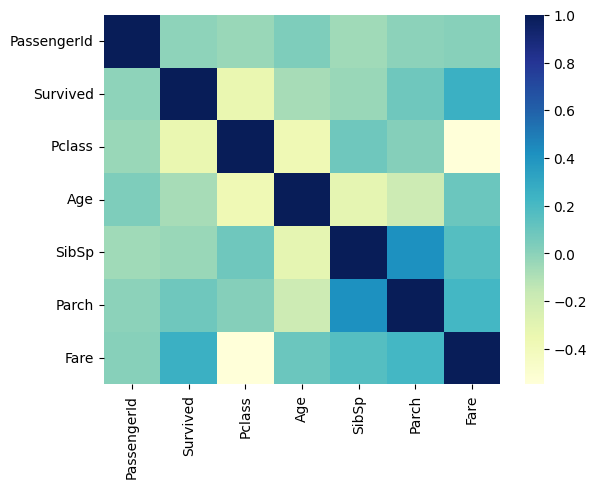

In [ ]:
# Correlations (we are interested in the correlation with "survival")
sns.heatmap(train_titanic_data.corr(), cmap="YlGnBu")

For example, we will consider a negative correlation (the value is negative) between `Pclass` and `survived`. We see that the smaller the value of `Pclass`, the larger the number of `survived`.

We also see that the more expensive the ticket (more was paid for it), the higher the probability of survival

In [ ]:
missing_values = train_titanic_data.isnull().sum()

print(f"Missing values:\n{missing_values}")

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handling missing values

# 1. Age: Fill missing values with the median
train_titanic_data["Age"].fillna(train_titanic_data["Age"].median(), inplace=True)

# 2. Cabin: Drop the colum
train_titanic_data.drop(["Cabin"], axis=1, inplace=True)

# 3. Embarked: Fill missing values with the most common value
most_common_embarked = train_titanic_data["Embarked"].mode()[0]
train_titanic_data['Embarked'].fillna(most_common_embarked, inplace=True)

# Verify if missing values are handled
missing_values_after_handling = train_titanic_data.isnull().sum()
print(f"Missing values after handling:\n{missing_values_after_handling}")

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Calculate the percentage of people who survived
survival_percentage = (train_titanic_data['Survived'].sum() / len(train_titanic_data)) * 100

# print the result
print(f"Percentage of people who survived {survival_percentage:.2f}%")

Percentage of people who survived 38.38%


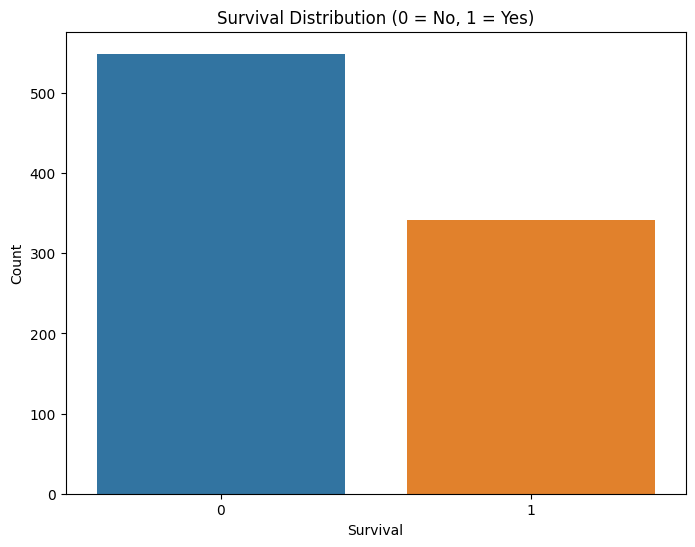

In [ ]:
# Visualize survival rate
plt.figure(figsize=(8, 6))

# Create a count plot of the "Survived" column
sns.countplot(x='Survived', data=train_titanic_data)

# Set the title of the plot
plt.title("Survival Distribution (0 = No, 1 = Yes)")

# Set the label for the x-axis
plt.xlabel("Survival")

# Set the label for the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()

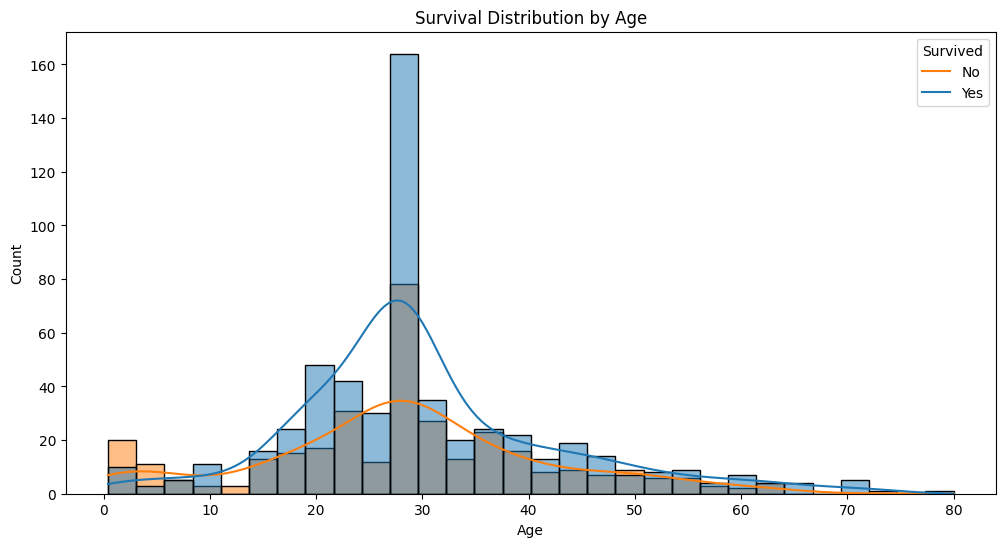

In [ ]:
# Visualize survival rate by age

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot a histogram with Kernel Density Estimation (KDE)
sns.histplot(data=train_titanic_data, x="Age", hue="Survived", kde=True)

# Set the title of the plot
plt.title("Survival Distribution by Age")

# Set the label for the x-axis
plt.xlabel("Age")

# Set the label for the y-axis
plt.ylabel("Count")

# Add a legend to the plot with custom labels
plt.legend(title="Survived", labels=["No", "Yes"])

# Display the plot
plt.show()

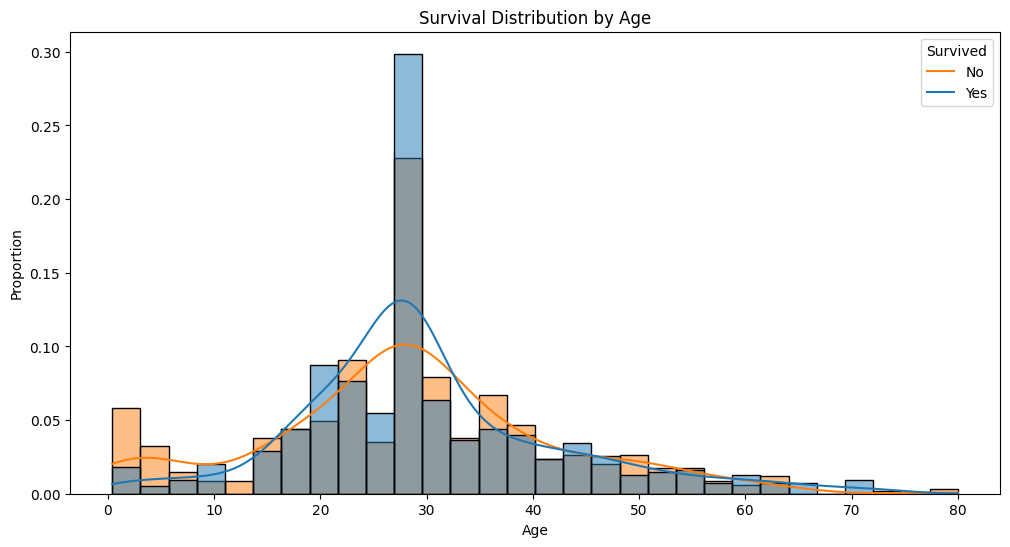

In [ ]:
# Visualize survival rate by age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_titanic_data, kde=True, stat='probability', common_norm=False)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<ipython-input-34-dcd1c88dd103>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_titanic_data, x="Sex", y="Survived", ci=None)


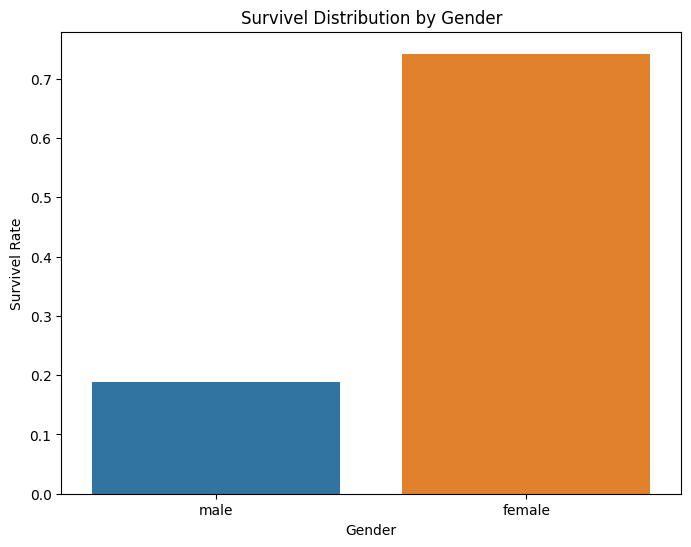

In [ ]:
# Visualing survivel rate by gender
plt.figure(figsize=(8,6))

sns.barplot(data=train_titanic_data, x="Sex", y="Survived", ci=None)
plt.title("Survivel Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Survivel Rate")

plt.show()

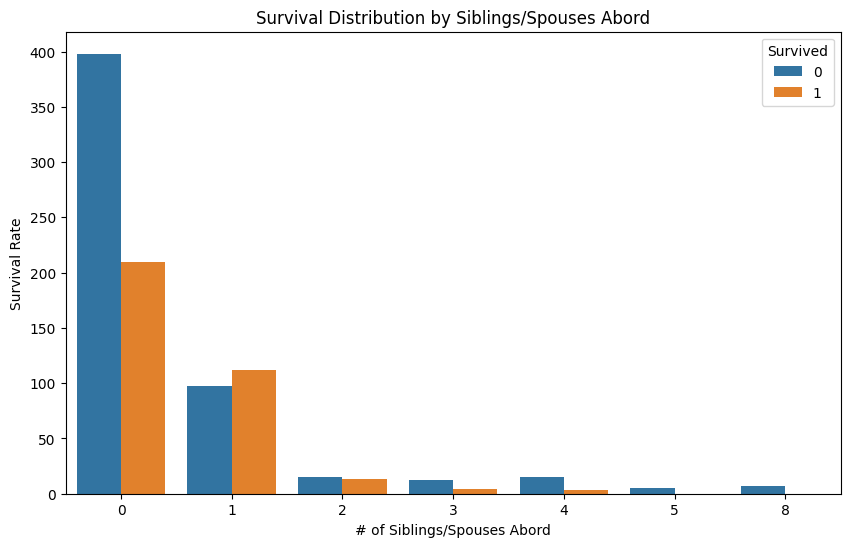

In [ ]:
# Visualize survival rate by nummber of siblings/spouses
plt.figure(figsize=(10, 6))

sns.countplot(data=train_titanic_data, x='SibSp', hue='Survived')
plt.title("Survival Distribution by Siblings/Spouses Abord")
plt.xlabel("# of Siblings/Spouses Abord")
plt.ylabel("Survival Rate")

plt.show()

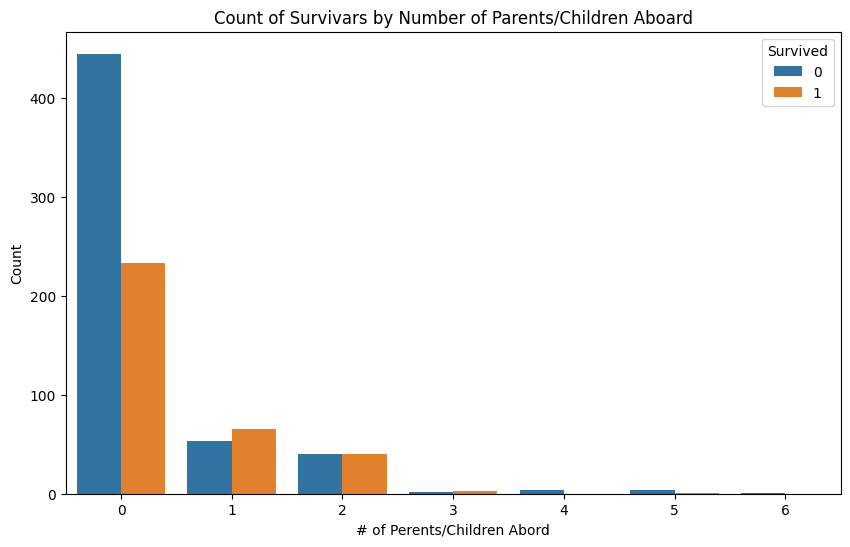

In [ ]:
# Explore Demographic Caracteristics
plt.figure(figsize=(10, 6))

sns.countplot(data=train_titanic_data, x='Parch', hue='Survived')
plt.title("Count of Survivars by Number of Parents/Children Aboard")
plt.xlabel("# of Perents/Children Abord")
plt.ylabel("Count")

plt.show()

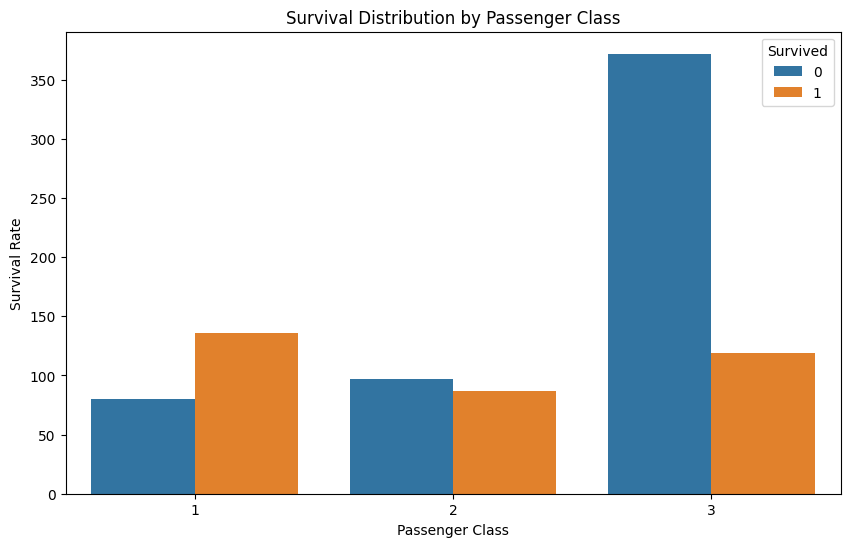

In [ ]:
# Visualize survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_titanic_data)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

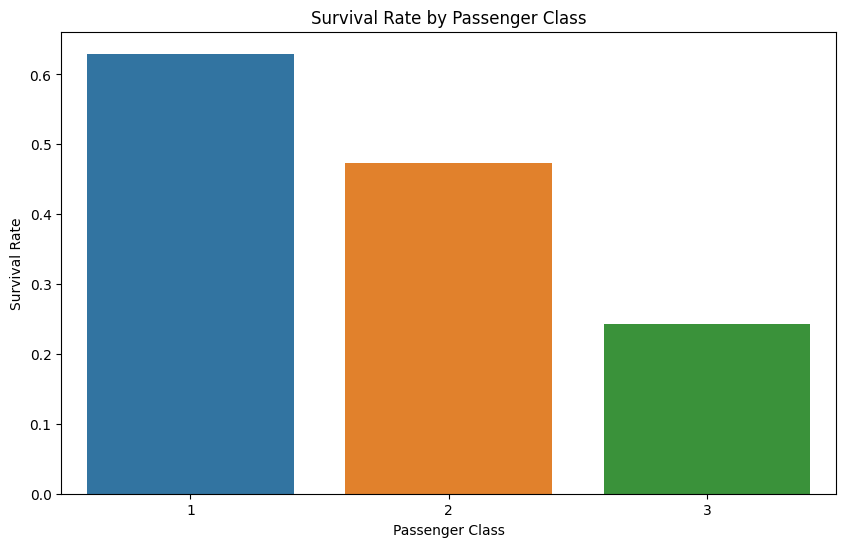

In [ ]:
# Visualize survival rate (proportion) by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_titanic_data, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Calculate average fare for survivors and non-survivors
average_fare = train_titanic_data.groupby('Survived')['Fare'].mean()

# Display the results
print(f"Average Fare for Non-Survivors: {average_fare[0]:.2f}")
print(f"Average Fare for Survivors: {average_fare[1]:.2f}")

Average Fare for Non-Survivors: 22.12
Average Fare for Survivors: 48.40


In [ ]:
# Create a cross-tabulation of Embarked and Survived
embarked_survival = pd.crosstab(train_titanic_data['Embarked'], train_titanic_data['Survived'], margins=True, margins_name='Total')

# Plot the cross-tabulation
embarked_survival

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
Total,549,342,891


Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Survived: A binary variable indicating whether a passenger survived (1) or not (0).


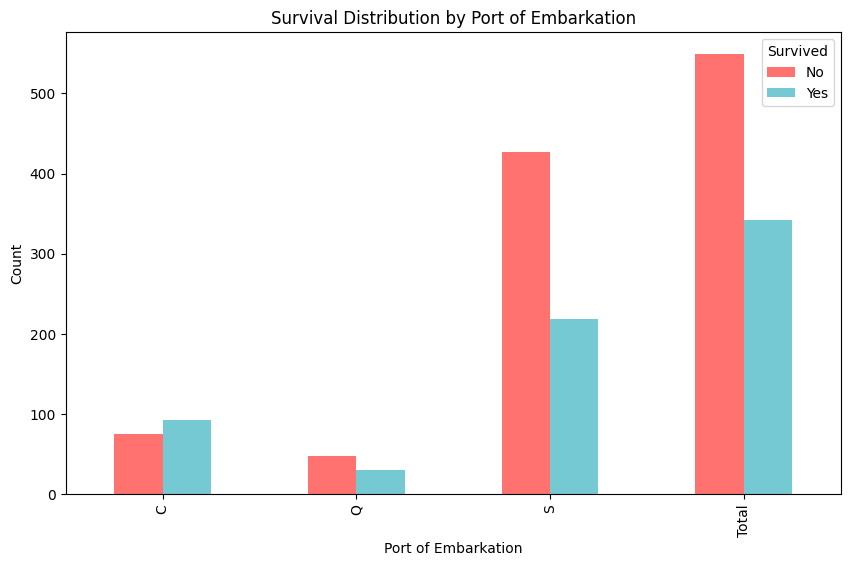

In [ ]:
embarked_survival.drop('Total', axis=1, inplace=True)  # Remove the 'Total' column for a clearer plot

# Plot a grouped bar plot
embarked_survival.plot(kind='bar', color=['#FF726F', '#74C9D2'], figsize=(10, 6))
plt.title('Survival Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
# Calculate survival rate (percentage) for each combination of "Embarked" and "Survived"
embarked_survival_rate = pd.crosstab(index=train_titanic_data['Embarked'], columns=train_titanic_data['Survived'], normalize='index') * 100

# Display the table
embarked_survival_rate

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


-----------------------------------

## Model Building & Prediction

In [ ]:
# Load test data
test_titanic_data = pd.read_csv("drive/MyDrive/Colab Notebooks/Titanic/titanic_data/test.csv")

In [ ]:
train_titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
train_titanic_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [ ]:
train_titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# Perform one-hot encoding on catergorical columns

train_titanic_data = pd.get_dummies(train_titanic_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [ ]:
train_titanic_data.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
train_titanic_data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
train_titanic_data[numerical_columns] = scaler.fit_transform(train_titanic_data[numerical_columns])

In [ ]:
# Split the data into features (X) and labels/target (y)
X = train_titanic_data.drop(['Survived'], axis=1)
y = train_titanic_data['Survived']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
}

### Hyperparameters Explanation:
#### Random Forest:
- n_estimators: The number of trees in the forest.
- max_depth: The maximum depth of the tree.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

#### Gradient Boosting:
- n_estimators: The number of boosting stages to be run.
- learning_rate: The step size shrinkage to prevent overfitting. Lower values make the algorithm more robust.
- max_depth: The maximum depth of the individual trees.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

#### Support Vector Machine (SVM):
- C: Regularization parameter. The strength of the regularization is inversely proportional to C.
- gamma: Kernel coefficient for 'rbf' and 'poly'. Higher values lead to more complex decision boundaries.
- kernel: Specifies the kernel type to be used in the algorithm. 'linear' is a linear kernel, and 'rbf' is a radial basis function kernel.

Adjusting these hyperparameters allows us to fine-tune the performance of the machine learning models. Grid search involves exploring all possible combinations of these hyperparameter values within the specified ranges to find the combination that produces the best results.

In [ ]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [ ]:
grid_rf = GridSearchCV(rf, param_grid['RandomForest'], cv=5)
grid_rf.fit(X_train, y_train)

grid_gb = GridSearchCV(gb, param_grid['GradientBoosting'], cv=5)
grid_gb.fit(X_train, y_train)

grid_svm = GridSearchCV(svm, param_grid['SVM'], cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [ ]:
print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best accuracy:", grid_rf.best_score_)

print("Gradient Boosting - Best parameters:", grid_gb.best_params_)
print("Gradient Boosting - Best accuracy:", grid_gb.best_score_)

print("SVM - Best parameters:", grid_svm.best_params_)
print("SVM - Best accuracy:", grid_svm.best_score_)

Random Forest - Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Random Forest - Best accuracy: 0.8342460356544864
Gradient Boosting - Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Gradient Boosting - Best accuracy: 0.8272530286614794
SVM - Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM - Best accuracy: 0.8174135723431497


In [ ]:
# We will choose the best model. In our case it is RandomForestClassifier
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42  # You can set a random seed for reproducibility
)

In [ ]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [ ]:
y_pred = best_rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8491620111731844


In [ ]:
test_titanic_data['Age'].fillna(test_titanic_data['Age'].median(), inplace=True)
test_titanic_data['Fare'].fillna(test_titanic_data['Fare'].median(), inplace=True)
# 2. Cabin: Drop the column
test_titanic_data.drop(['Cabin'], axis=1, inplace=True)

# 3. Embarked: Fill missing values with the most common value
most_common_embarked_test = test_titanic_data['Embarked'].mode()[0]
test_titanic_data['Embarked'].fillna(most_common_embarked_test, inplace=True)
test_titanic_data = test_titanic_data.drop(['Name','PassengerId', 'Ticket'], axis=1)
test_titanic_data = pd.get_dummies(test_titanic_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test_titanic_data[numerical_columns] = scaler.fit_transform(test_titanic_data[numerical_columns])

In [ ]:
new_prediciton = best_rf_model.predict(test_titanic_data)

In [ ]:
test_titanic_data["Survived_prediciton"] = new_prediciton

test_titanic_data

In [ ]:
test_titanic_data[test_titanic_data['Survived_prediciton'] == 1].head()

--------------------------------------

In [ ]:
def save_model(model):
  import os
  from datetime import datetime
  import pickle

  modeldir = os.path.join("drive/MyDrive/Colab Notebooks/Titanic/models",
                          datetime.now().strftime("%d-%m-%y--%H:%M:%s"))
  model_path = modeldir + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")

  pickle.dump(model, open(model_path, "wb"))

save_model(best_rf_model)

Saving model to: drive/MyDrive/Colab Notebooks/Titanic/models/06-01-24--09:59:1704535140.h5...


In [ ]:
def load_model(model):
  import pickle

  return pickle.load(open(model, "rb"))

loaded_model = load_model('drive/MyDrive/Colab Notebooks/Titanic/models/06-01-24--09:59:1704535140.h5')

In [ ]:
predictions = loaded_model.predict(test_titanic_data)

predictions

In [ ]:
test_titanic_data["Survived_prediciton"] = predictions

test_titanic_data[test_titanic_data['Survived_prediciton'] == 1]